# Tarea 6: TCL e introducción a Bootstrap

Solución de los ejercicios de la sección `Intervalos de confianza y remuestreo` del libro del curso [Fundamentos Estadísticos](https://tereom.github.io/fundamentos-2022/intervalos-de-confianza-y-remuestreo.html)

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import gamma, norm, binom, probplot

## Teorema central del límite
Navegar a la siguiente [liga](https://docs.scipy.org/doc/scipy/reference/stats.html) para consultar cómo constuir distribuciones con `python scipy`

**Ejemplo 1**
<br>Consideramos la distribución gamma con parámetro de forma $a=5$, tasa $\lambda = 0.1$. Su media teórica es $50 = 5/0.1$ cuya densidad teórica es:

In [2]:
x = np.arange(0, 150.01, 0.01)
lamb = 0.1

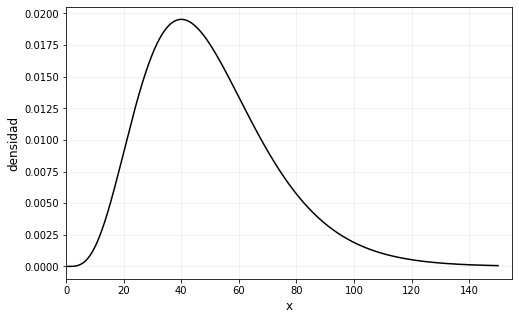

In [3]:
plt.figure(figsize=(8,5))
plt.plot(x, gamma.pdf(x, a=5, scale=1/lamb), color='black')

#Anotaciones y estilo
plt.xlabel('x', fontsize=12)
plt.xlim(0,155)
plt.ylabel('densidad', fontsize=12)
plt.grid(alpha=0.2)

plt.show()

Tomamos una muestra, la distribución de los datos se ve como sigue

In [4]:
n = 200
muestra = gamma.rvs(a=5, scale=1/lamb, size=n, random_state=232)

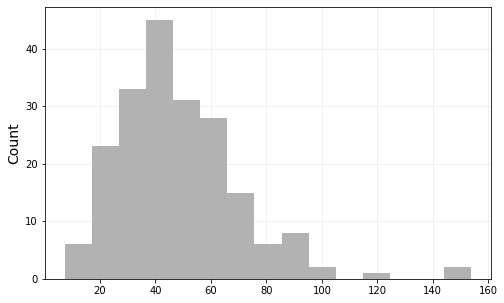

In [5]:
plt.figure(figsize=(8,5))

plt.hist(muestra, bins=15, color='black', alpha=0.3)

#Anotaciones y estilo global
plt.ylabel('Count', fontsize=14)
plt.grid(alpha=0.2)

plt.show()

**NO** parece tener una distribución normal, está sesgada hacia la izquierda.

**Ahora** consideramos la distribución de muestreo de la media de esta distribución, con tamaño de muestra fijo $n$ para `5_000` iteraciones.

Documentación de la función [random.choices()](https://pynative.com/python-random-sample/)

In [6]:
medias_gamma = [np.mean(random.choices(list(muestra), k=n)) for _ in range(5_000)]

Haciendo un histograma, se puede observar que la **distribución muestral de medias es normal**.

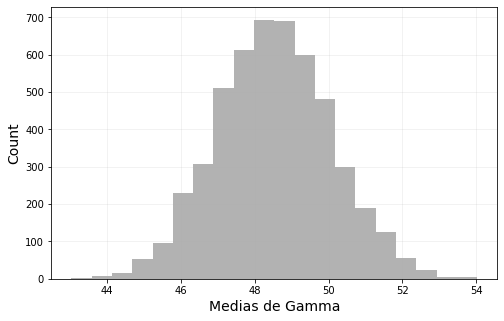

In [7]:
plt.figure(figsize=(8,5))

plt.hist(medias_gamma, bins=20, color='black', alpha=0.3)

#Anotaciones y estilo global
plt.xlabel('Medias de Gamma', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(alpha=0.2)

plt.show()

**Ejemplo 2**: Mezcla de distribuciones
<br>Este ejemplo es más complicado. Imaginemos que nuestro modelo teórico es una mezcla de dos poblaciones, una gamma y una normal:

In [8]:
def muestrear_pob(n):
    muestra = np.zeros(n)
    
    for i in range(n):
        if random.random() < 0.5:
            muestra[i] = gamma.rvs(a=5, scale=1/lamb, size=1)[0]
        else:
            muestra[i] = norm.rvs(loc=100, scale=1/lamb, size=1)[0]
    
    return muestra

In [9]:
x = np.arange(0, 150.01, 0.01)
lamb = 0.1

muestra_aprox = muestrear_pob(10_000)

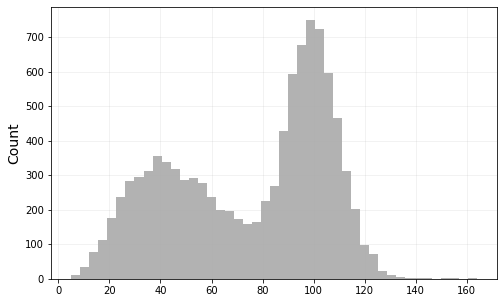

In [10]:
plt.figure(figsize=(8,5))

plt.hist(muestra_aprox, bins=45, color='black', alpha=0.3)

#Anotaciones y estilo global
plt.ylabel('Count', fontsize=14)
plt.grid(alpha=0.2)

plt.show()

**Ahora** consideramos estimar la media de esta distribución con una muestra tamaño 100. ¿Cómo se ve la distribución de muestreo de la media?

In [11]:
n = 100
medias = [np.mean(random.choices(list(muestra_aprox), k=n)) for _ in range(2_000)]

Graficando `histograma` y `cuantil-cuantil normal`

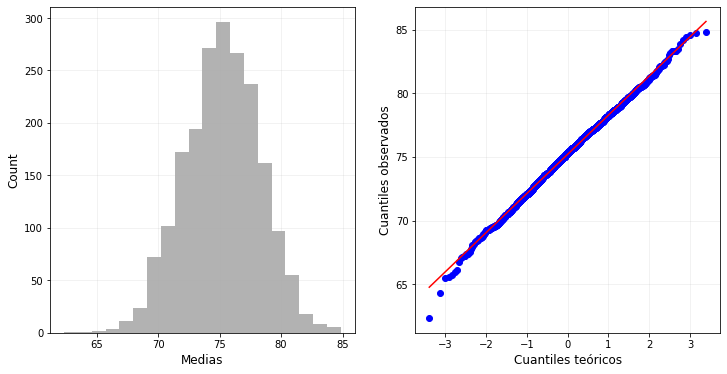

In [12]:
fig = plt.figure(figsize=(12,6))
spec = plt.GridSpec(nrows=1, ncols=2)

#Histograma
ax0 = fig.add_subplot(spec[0])
ax0.hist(medias, bins=20, color='black', alpha=0.3)
ax0.set_xlabel('Medias', fontsize=12)
ax0.set_ylabel('Count', fontsize=12)
ax0.grid(alpha=0.2)

#Gráfica cuantil-cuantil normal
ax1 = fig.add_subplot(spec[1])
probplot(medias, plot=ax1)
ax1.set_title('')
ax1.set_xlabel('Cuantiles teóricos', fontsize=12)
ax1.set_ylabel('Cuantiles observados', fontsize=12)
ax1.grid(alpha=0.2)

plt.show()

**Ejemplo 3**: Caso discreto
<br>Tomaremos muestra de unos y ceros, la media es la proporción de unos en la muestra o la proporción de "soles":

In [13]:
n = 200

muestra = binom.rvs(n=1, p=0.7, size=n, random_state=1212)
muestra.mean()

0.655

¿Cuál es la distribución de muestreo para la proporción de soles en la muestra? Revisa con un `histograma` si se ve normal, también revisa una gráfica `qq`

In [14]:
prop_soles = [np.mean(random.choices(list(muestra), k=n)) for _ in range(5_000)]

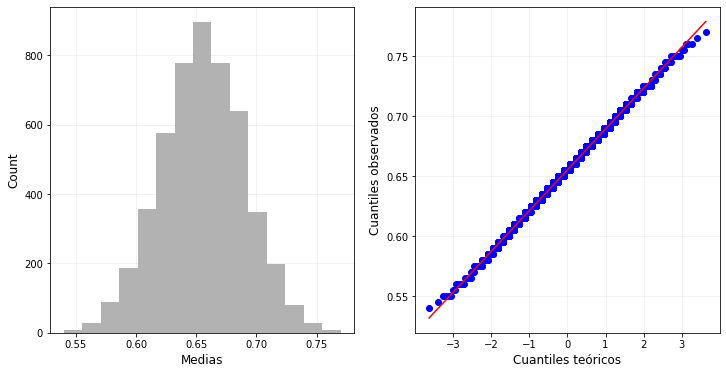

In [15]:
fig = plt.figure(figsize=(12,6))
spec = plt.GridSpec(nrows=1, ncols=2)

#Histograma
ax0 = fig.add_subplot(spec[0])
ax0.hist(prop_soles, bins=15, color='black', alpha=0.3)
ax0.set_xlabel('Medias', fontsize=12)
ax0.set_ylabel('Count', fontsize=12)
ax0.grid(alpha=0.2)

#Gráfica cuantil-cuantil normal
ax1 = fig.add_subplot(spec[1])
probplot(prop_soles, plot=ax1)
ax1.set_title('')
ax1.set_xlabel('Cuantiles teóricos', fontsize=12)
ax1.set_ylabel('Cuantiles observados', fontsize=12)
ax1.grid(alpha=0.2)

plt.show()

La distribución se ve normal

## Boostrap

**Ejemplo 1** Error estándar de una media
<br>Retomaremos el ejemplo de la prueba ENLACE de la tarea anterior. Para cada tamaño de muestra $n = 10, 100, 1000$

In [16]:
path_universal = "C:\\Users\\Miguel\\Documents\\Github\\itam-mcd"
os.listdir(path_universal)

['.git',
 '.gitignore',
 'aprendizaje-automatico',
 'estadistica-computacional',
 'fundamentos-estadisticos',
 'mineria-analisis-datos',
 'optimizacion',
 'README.md']

In [17]:
path_asignatura = "fundamentos-estadisticos"
path_asignatura = os.path.join(path_universal, path_asignatura)
os.listdir(path_asignatura)

['datos', 'libros', 'README.md']

In [18]:
#Se obtiene dataset original
file_path = "datos\\enlace_15.csv"
enlace = pd.read_csv(os.path.join(path_asignatura, file_path))
enlace.head()

,id,cve_ent,turno,tipo,esp_3,esp_6,n_eval_3,n_eval_6
0,38570,15,MATUTINO,INDêGENA,550,483,13,19
1,38571,15,MATUTINO,INDêGENA,485,490,17,18
2,38572,15,MATUTINO,INDêGENA,462,385,9,9
3,38573,15,MATUTINO,INDêGENA,646,613,33,26
4,38574,15,MATUTINO,INDêGENA,508,452,26,35


1) Selecciona una única muestra y utilizala para estimar la media de las calificaciones de español 3o de primaria

In [19]:
n = {'n': [10, 100, 1_000],
    'sample': [],
    'std_err': [],
    'bootstrap_dist': []}

#Seleccionando muestra única
for i in n['n']:
    sample = enlace['esp_3'].sample(i)
    n['sample'].append(sample)
    print(f"sample {i:,}, mean: {sample.mean()}")

sample 10, mean: 541.3
sample 100, mean: 558.39
sample 1,000, mean: 552.303


In [20]:
n['sample'][0]

456     572
3171    589
5172    533
2545    641
1382    524
7433    546
2299    550
3476    514
2717    436
6081    508
Name: esp_3, dtype: int64

2) Utiliza bootstrap para calcular el error estándar de tu estimador

In [21]:
for i in range(len(n['n'])):
    boots_dist = []
    for j in range(2_000):
        mean = np.mean(random.choices(list(n['sample'][i]), k=n['n'][i]))
        boots_dist.append(mean)
    
    n['bootstrap_dist'].append(boots_dist)
    n['std_err'].append(np.std(n['bootstrap_dist'][i]))

In [22]:
for i in range(len(n['n'])):
    print(f"std. err. n={n['n'][i]}: {n['std_err'][i]:.2f}")

std. err. n=10: 16.58
std. err. n=100: 6.06
std. err. n=1000: 1.86


3) Grafica la distribución bootstrap

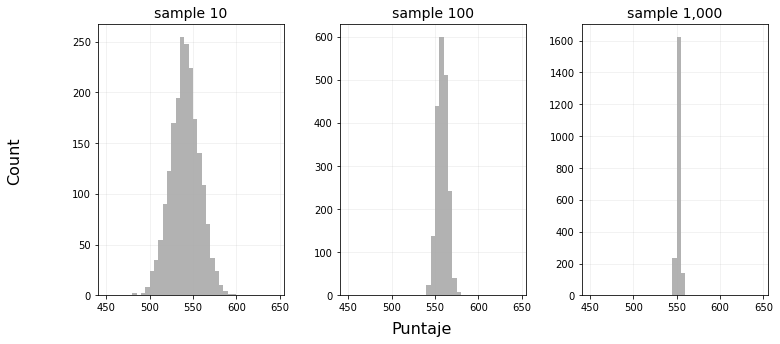

In [23]:
fig = plt.figure(figsize=(12,5))
spec = plt.GridSpec(ncols=3, nrows=1, wspace=0.3)
bins = np.arange(450, 650, 5)

#Para muestra tamaño 10
ax0 = fig.add_subplot(spec[0])
ax0.hist(n['bootstrap_dist'][0], bins=bins, color='black', alpha=0.3)
ax0.set_title('sample 10', fontsize=14)
ax0.grid(alpha=0.2)

#Para muestra tamaño 100
ax1 = fig.add_subplot(spec[1])
ax1.hist(n['bootstrap_dist'][1], bins=bins, color='black', alpha=0.3)
ax1.set_title('sample 100', fontsize=14)
ax1.grid(alpha=0.2)

#Para muestra tamaño 1_000
ax1 = fig.add_subplot(spec[2])
ax1.hist(n['bootstrap_dist'][2], bins=bins, color='black', alpha=0.3)
ax1.set_title('sample 1,000', fontsize=14)
ax1.grid(alpha=0.2)

#Anotaciones y estilo global
fig.supxlabel('Puntaje', fontsize=16)
fig.supylabel('Count', fontsize=16)

plt.show()

Retoma la muestra de tamaño 100, y calcula la correlación entre las calificaciones de español 3o y 6o de primaria. Utiliza bootstrap para calcular el error estandar 